<a href="https://colab.research.google.com/github/ricardorocha86/Python-para-Machine-Learning/blob/master/Python_para_ML_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![texto alternativo](https://raw.githubusercontent.com/ricardorocha86/Python-para-Machine-Learning/master/Imagens/capa%20-%20python%20para%20ml%2009.jpg)


# **Python para Machine Learning** - Parte 9

Nesse notebook vamos ver:
- A Validação Holdout
- A Validação Cruzada K-Fold
- Exercícios
- Links Úteis

## **A Validação Holdout**

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ricardorocha86/Dados-Redes-Sociais/master/Social_Network_Ads.csv'
ads = pd.read_csv(url)

In [ ]:
#Fazendo a Divisão em Teste e Treinamento
from sklearn.model_selection import train_test_split
Xtreino, Xteste, Ytreino, Yteste = train_test_split(ads.loc[:, ['Age', 'EstimatedSalary']], 
                                                    ads['Purchased'], 
                                                    test_size = 0.25)

#Padronizando os Dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtreino = sc.fit_transform(Xtreino)
Xteste = sc.transform(Xteste)

In [ ]:
def Modelagem(k):

    #Treinando o Modelo
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Xtreino, Ytreino)

    #Verificando o ACC
    from sklearn.metrics import accuracy_score 
    preditos_teste = knn.predict(Xteste)
    acc_teste = accuracy_score(preditos_teste, Yteste)
    
    return acc_teste



In [ ]:
Modelagem(15)

0.89

In [ ]:
import numpy as np
kas = np.arange(1, 100, 2)
kas

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

In [ ]:
accs = []

for i in kas:
    accs.append(Modelagem(i))

accs


In [ ]:
kas[accs.index(max(accs))]

11

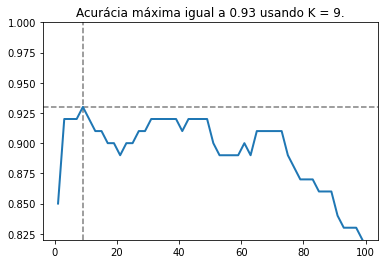

In [ ]:

import matplotlib.pyplot as plt

#Qual é o valor de K que atinge o máximo da acurácia?
kmax = kas[accs.index(max(accs))]


plt.axvline(kmax, color = 'gray', linestyle = 'dashed')
plt.axhline(max(accs), color = 'gray', linestyle = 'dashed')

plt.plot(kas, accs, linewidth = 2)
plt.ylim(min(accs), 1)
frase = 'Acurácia máxima igual a {} usando K = {}.'.format(max(accs), kmax)
plt.title(frase)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score     
import numpy as np
import matplotlib.pyplot as plt

def VariaTesteTreino():
    #Fazendo a Divisão em Teste e Treinamento
    Xtreino, Xteste, Ytreino, Yteste = train_test_split(ads.loc[:, ['Age', 'EstimatedSalary']], 
                                                        ads['Purchased'], 
                                                        test_size = 0.25)

    #Padronizando os Dados
    sc = StandardScaler()
    Xtreino = sc.fit_transform(Xtreino)
    Xteste = sc.transform(Xteste)

    def Modelagem(k):
        #Treinando o Modelo
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(Xtreino, Ytreino)

        #Verificando o ACC
        preditos_teste = knn.predict(Xteste)
        acc_teste = accuracy_score(preditos_teste, Yteste)
        return acc_teste

    #Fazendo a variação dentre as possibilidades de K (de 1 a 99, de 2 em 2)

    kas = np.arange(1,100,2)

    accs = []
    for i in kas:
        accs.append(Modelagem(i))
 

    #Qual é o valor de K que atinge o máximo da acurácia?
    kmax = kas[accs.index(max(accs))]
    return kmax

In [ ]:
VariaTesteTreino()

37

## **K-Fold**

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ricardorocha86/Dados-Redes-Sociais/master/Social_Network_Ads.csv'
ads = pd.read_csv(url)

In [ ]:
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
ads.drop(['User ID', 'Gender'], axis = 1, inplace = True)
ads.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0


In [ ]:
ads_vars = ads[['Age', 'EstimatedSalary']]
ads_resp = ads['Purchased']

In [ ]:
ads_vars

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [ ]:
#Padronizando os Dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ads_vars = sc.fit_transform(ads_vars)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
modelo = KNeighborsClassifier(n_neighbors = 13)

kf = KFold(n_splits = 400, shuffle = True)
accs_vc = cross_val_score(modelo, ads_vars, ads_resp, cv = kf, scoring = 'accuracy')

print(accs_vc)
print('Acurácia: {:.2f}%'.format(100*accs_vc.mean()))

[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.

In [ ]:
def MeuKFold(k):
    modelo = KNeighborsClassifier(n_neighbors = k)

    kf = KFold(n_splits = 50, shuffle = True)
    accs_vc = cross_val_score(modelo, ads_vars, ads_resp, cv = kf, scoring = 'accuracy')

    return accs_vc.mean()

In [ ]:
kas = np.arange(1,100,2)

accs = []
for i in kas:
    accs.append(MeuKFold(i))

In [ ]:
accs

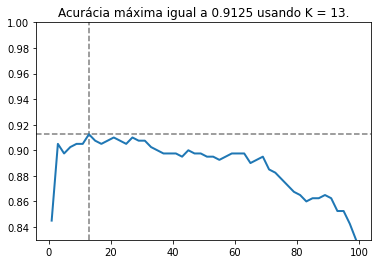

In [ ]:
kmax = kas[accs.index(max(accs))]

plt.axvline(kmax, color = 'gray', linestyle = 'dashed')
plt.axhline(max(accs), color = 'gray', linestyle = 'dashed')
plt.plot(kas, accs, linewidth = 2)
plt.ylim(min(accs), 1)
frase = 'Acurácia máxima igual a {} usando K = {}.'.format(max(accs), kmax)
plt.title(frase)
plt.show()

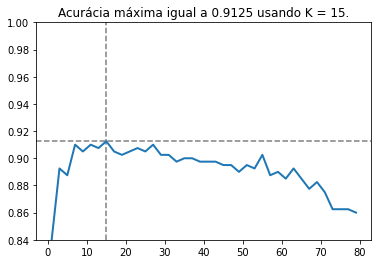

In [ ]:
def MeuKFold(k):
    modelo = KNeighborsClassifier(n_neighbors = k)

    kf = KFold(n_splits = 10, shuffle = True)
    accs_vc = cross_val_score(modelo, ads_vars, ads_resp, cv = kf, scoring = 'accuracy')

    return accs_vc.mean()

kas = np.arange(1,80,2)

accs = []
for i in kas:
    accs.append(MeuKFold(i))

kmax = kas[accs.index(max(accs))]

plt.axvline(kmax, color = 'gray', linestyle = 'dashed')
plt.axhline(max(accs), color = 'gray', linestyle = 'dashed')
plt.plot(kas, accs, linewidth = 2)
plt.ylim(min(accs), 1)
frase = 'Acurácia máxima igual a {:.4f} usando K = {}.'.format(max(accs), kmax)
plt.title(frase)
plt.show()

## **Exercício**

Verifique o EQM no exemplo da aula anterior utilizando o método da Validação Cruzada K-Fold